In [59]:
import pandas as pd

file = "confidence_singleterm_dynamic_fewshot_4-turbo-preview_with_gpt-3.5-turbo"
INPUT_PATH = f"../../../Datasets/Evaluations/Sentiment Analysis/Error_Analysis/{file}.csv"
OUTPUT_PATH = f"../../../Datasets/Evaluations/Sentiment Analysis/Error_Analysis/Eval/confidence_analysis_{file}.csv"

In [61]:
df = pd.read_csv(INPUT_PATH)

In [62]:
print(df.head())

   Unnamed: 0.1  Unnamed: 0  text_id  term_id  \
0             0           0        0        0   
1             1           1        0        1   
2             2           2        0        2   
3             3           3        0        3   
4             4           4        1        4   

                                                text  \
0  Amusing details distinguish desserts, from dul...   
1  Amusing details distinguish desserts, from dul...   
2  Amusing details distinguish desserts, from dul...   
3  Amusing details distinguish desserts, from dul...   
4  The server was so busy the night we visited th...   

                          term  polarity  example1_term_id  \
0                     desserts  positive              9500   
1     dulce de leche ice-cream   neutral              9500   
2  chocolate sauce tic-tac-toe   neutral              9500   
3            poached pineapple   neutral              9500   
4                       server  negative              1211

In [63]:

def extract_numbers(text):
    confidence = int(text.split("Confidence: ")[1].split("%")[0])
    return confidence

df[['confidence']] = df['analysis'].apply(lambda x: pd.Series(extract_numbers(x)))


In [64]:
df['error'] = df.apply(lambda row: 'correct' if row['polarity_pred'] == row['polarity'] else 'error', axis=1)
print(df.head())

   Unnamed: 0.1  Unnamed: 0  text_id  term_id  \
0             0           0        0        0   
1             1           1        0        1   
2             2           2        0        2   
3             3           3        0        3   
4             4           4        1        4   

                                                text  \
0  Amusing details distinguish desserts, from dul...   
1  Amusing details distinguish desserts, from dul...   
2  Amusing details distinguish desserts, from dul...   
3  Amusing details distinguish desserts, from dul...   
4  The server was so busy the night we visited th...   

                          term  polarity  example1_term_id  \
0                     desserts  positive              9500   
1     dulce de leche ice-cream   neutral              9500   
2  chocolate sauce tic-tac-toe   neutral              9500   
3            poached pineapple   neutral              9500   
4                       server  negative              1211

In [65]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn import metrics

#print(df_overall.head())

df_data = df

df_data['y_true_pos'] = df_data['polarity']
df_data['y_true_pos'] = df_data['y_true_pos'] .replace('positive', 1)
df_data['y_true_pos'] = df_data['y_true_pos'] .replace('neutral', 0)
df_data['y_true_pos'] = df_data['y_true_pos'] .replace('negative', 0)
df_data['y_pred_pos'] = df_data['polarity_pred']
df_data['y_pred_pos'] = df_data['y_pred_pos'].replace('positive', 1)
df_data['y_pred_pos'] = df_data['y_pred_pos'].replace('neutral', 0)
df_data['y_pred_pos'] = df_data['y_pred_pos'].replace('negative', 0)


df_data['y_true_neu'] = df_data['polarity']
df_data['y_true_neu'] = df_data['y_true_neu'].replace('neutral', 1)
df_data['y_true_neu'] = df_data['y_true_neu'].replace('positive', 0)
df_data['y_true_neu'] = df_data['y_true_neu'].replace('negative', 0)
df_data['y_pred_neu'] = df_data['polarity_pred']
df_data['y_pred_neu'] = df_data['y_pred_neu'].replace('neutral', 1)
df_data['y_pred_neu'] = df_data['y_pred_neu'].replace('positive', 0)
df_data['y_pred_neu'] = df_data['y_pred_neu'].replace('negative', 0)

df_data['y_true_neg'] = df_data['polarity']
df_data['y_true_neg'] = df_data['y_true_neg'].replace('negative', 1)
df_data['y_true_neg'] = df_data['y_true_neg'].replace('neutral', 0)
df_data['y_true_neg'] = df_data['y_true_neg'].replace('positive', 0)
df_data['y_pred_neg'] = df_data['polarity_pred']
df_data['y_pred_neg'] = df_data['y_pred_neg'].replace('negative', 1)
df_data['y_pred_neg'] = df_data['y_pred_neg'].replace('neutral', 0)
df_data['y_pred_neg'] = df_data['y_pred_neg'].replace('positive', 0)

df_data['confidence_pos'] = df_data['confidence']
df_data['confidence_neu'] = df_data['confidence']
df_data['confidence_neg'] = df_data['confidence']
df_data.loc[df_data['y_pred_pos'] == 0, 'confidence_pos'] = 100 - df_data.loc[df_data['y_pred_pos'] == 0, 'confidence_pos']
df_data['confidence_pos'] = df_data['confidence_pos'] / 100
df_data.loc[df_data['y_pred_neu'] == 0, 'confidence_neu'] = 100 - df_data.loc[df_data['y_pred_neu'] == 0, 'confidence_neu']
df_data['confidence_neu'] = df_data['confidence_neu'] / 100
df_data.loc[df_data['y_pred_neg'] == 0, 'confidence_neg'] = 100 - df_data.loc[df_data['y_pred_neg'] == 0, 'confidence_neg']
df_data['confidence_neg'] = df_data['confidence_neg'] / 100


/var/folders/pw/9fnphybj4kq8t6wt3h592_9r0000gn/T/ipykernel_1400/1045745626.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_data['y_true_pos'] = df_data['y_true_pos'] .replace('negative', 0)
/var/folders/pw/9fnphybj4kq8t6wt3h592_9r0000gn/T/ipykernel_1400/1045745626.py:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_data['y_pred_pos'] = df_data['y_pred_pos'].replace('negative', 0)
/var/folders/pw/9fnphybj4kq8t6wt3h592_9r0000gn/T/ipykernel_1400/1045745626.py:21: FutureWarning: Downcasting behavior in `replace` is depreca

In [66]:
print(df_data.head())

   Unnamed: 0.1  Unnamed: 0  text_id  term_id  \
0             0           0        0        0   
1             1           1        0        1   
2             2           2        0        2   
3             3           3        0        3   
4             4           4        1        4   

                                                text  \
0  Amusing details distinguish desserts, from dul...   
1  Amusing details distinguish desserts, from dul...   
2  Amusing details distinguish desserts, from dul...   
3  Amusing details distinguish desserts, from dul...   
4  The server was so busy the night we visited th...   

                          term  polarity  example1_term_id  \
0                     desserts  positive              9500   
1     dulce de leche ice-cream   neutral              9500   
2  chocolate sauce tic-tac-toe   neutral              9500   
3            poached pineapple   neutral              9500   
4                       server  negative              1211

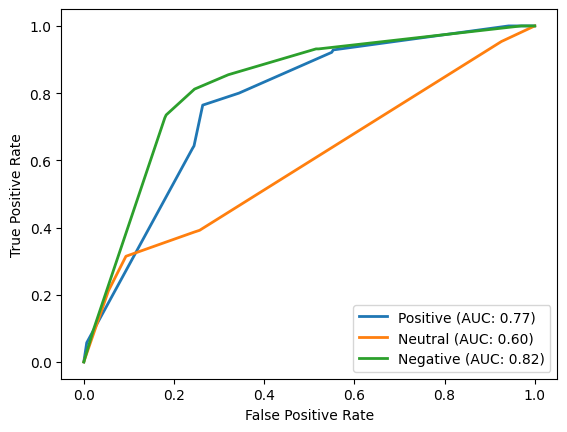

In [67]:
import matplotlib.pyplot as plt
fpr, tpr, _ = metrics.roc_curve(df_data['y_true_pos'],  df_data['confidence_pos'])
auc = metrics.roc_auc_score(df_data['y_true_pos'], df_data['confidence_pos'])
plt.plot(fpr, tpr, lw=2, label=f'Positive (AUC: {auc:.2f})')


fpr, tpr, _ = metrics.roc_curve(df_data['y_true_neu'],  df_data['confidence_neu'])
auc = metrics.roc_auc_score(df_data['y_true_neu'], df_data['confidence_neu'])
plt.plot(fpr, tpr, lw=2, label=f'Neutral (AUC: {auc:.2f})')


fpr, tpr, _ = metrics.roc_curve(df_data['y_true_neg'],  df_data['confidence_neg'])
auc = metrics.roc_auc_score(df_data['y_true_neg'], df_data['confidence_neg'])
plt.plot(fpr, tpr, lw=2, label=f'Negative (AUC: {auc:.2f})')


plt.legend(loc="lower right")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

print("\n")
plt.show()